In [91]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from cycler import cycler
import requests
from pywaffle import Waffle
import numpy as np
import squarify
from textblob import TextBlob
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
import math
import nltk
from nltk.corpus import stopwords
#nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from matplotlib.pyplot import figure
from PIL import Image
from sklearn.cluster import KMeans
import matplotlib.colors as colors

%matplotlib inline



In [3]:
plt.rcParams.update({
    'pdf.fonttype': 42,
    'axes.prop_cycle': cycler('color', ['#52bbb7', '#8fdeb4', '#f16764', '#ca4862', '#461d2d', '#9C2964', '#1B7EBE', '#E4C34A']),
    'ps.fonttype': 42,
    'grid.linestyle': '--',
    'axes.facecolor': '#8fdeb4',
    'figure.facecolor': '#8fdeb4',
    'axes.spines.left' : True,
    'axes.spines.right' : False,
    'axes.spines.top' : False,
    'axes.spines.bottom' : True,
    'font.family': 'sans',
    'font.sans-serif': 'RobotoCondensed-Bold',
    'font.serif': 'Lora-Regular',
    'axes.titlesize': 'x-large',
    'axes.titleweight': 'bold',
    'axes.grid': True,
    'grid.color': 'silver',
    'axes.axisbelow': True,
    'xtick.bottom' : False,
    'ytick.left' : False,
    'axes.titlepad' : 15.0,
    'legend.frameon' : False,
    'ytick.labelsize': 15,
    'xtick.labelsize': 15,
    'axes.titlesize': 30,
    'text.color': '#1B7EBE',
    'axes.labelcolor': '#1B7EBE',
    'xtick.color': '#1B7EBE',
    'ytick.color': '#1B7EBE'
    
})

In [48]:
df = pd.read_csv('all-ufo-sightings-thru-08-06-2018.csv')

In [49]:
df.seen_at = pd.to_datetime(df.seen_at)

# WORD CLOUDS

In [61]:
def discrete_cmap(N, base_cmap=None):
    """Create an N-bin discrete colormap from the specified input map"""

    # Note that if base_cmap is a string or None, you can simply do
    #    return plt.cm.get_cmap(base_cmap, N)
    # The following works for string, None, or a colormap instance:

    base = plt.cm.get_cmap(base_cmap)
    color_list = base(np.linspace(0, 1, N))
    cmap_name = base.name + str(N)
    return base.from_list(cmap_name, color_list, N)

In [66]:
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

In [96]:
default_stopwords = stopwords.words('english')

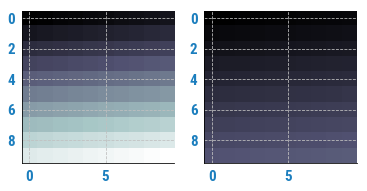

In [86]:
arr = np.linspace(0, 50, 100).reshape((10, 10))
fig, ax = plt.subplots(ncols=2)

cmap = plt.get_cmap('bone')
new_cmap = truncate_colormap(cmap, 0.0, 0.4)
ax[0].imshow(arr, interpolation='nearest', cmap=cmap)
ax[1].imshow(arr, interpolation='nearest', cmap=new_cmap)
plt.show()

In [112]:
'the' not in set(nltk.corpus.stopwords.words('english'))

False

In [108]:
def make_decade_wordcloud(df):
    beam_mask = np.array(Image.open("beam-02.png"))

    description_list = df.text.values.tolist()

    word_list = []
    
    for description in description_list:
        tokenized_description = nltk.word_tokenize(description)
        for token in tokenized_description:
            word_list.append(token)

    default_stopwords = set(nltk.corpus.stopwords.words('english'))
    word_list = [word.lower() for word in word_list if (len(word) > 2) and (word.isalpha() == True) and (word not in default_stopwords) and (word != 'the') and (word != 'like')]
   # word_list = [word for word in word_list if word.isalpha() == True]
   # word_list = [word for word in word_list if word not in default_stopwords]
   # word_list = [word.lower() for word in word_list]
   # word_list = [word for word in word_list if word != '...']

    wordnet_lemmatizer = WordNetLemmatizer()

    lemma_list = [wordnet_lemmatizer.lemmatize(word) for word in word_list]

    fdist = nltk.FreqDist(lemma_list)

    unigram_wordcloud = WordCloud(colormap=new_cmap, height=300, relative_scaling=.32, width=400, max_words = 80, min_font_size=13, contour_width=2, contour_color='gray', background_color='#8fdeb4', font_path='/Users/kevinlitnav/Library/Fonts/RobotoCondensed-Regular.ttf', mask=beam_mask).generate_from_frequencies(fdist)
    
    fig, ax = plt.subplots(facecolor='#8fdeb4')

    figure(num=None, figsize=(12,8), edgecolor='#8fdeb4')

    plt.imshow(unigram_wordcloud, interpolation='bilinear')
    plt.grid(False)
    plt.xticks(np.arange(0))
    plt.yticks(np.arange(0))
    plt.tight_layout(pad=0)

    plt.savefig('word-cloud-decade.svg', facecolor=fig.get_facecolor(), transparent=True, bbox_inches='tight')
    
    return 

In [63]:
df_1970s = df[df.seen_at.dt.year < 1980]
df_1980s = df[(df.seen_at.dt.year > 1979) & (df.seen_at.dt.year < 1990)]
df_1990s = df[(df.seen_at.dt.year > 1989) & (df.seen_at.dt.year < 2000)]
df_2000s = df[(df.seen_at.dt.year > 1999) & (df.seen_at.dt.year < 2010)]
df_2010s = df[df.seen_at.dt.year > 2009]

In [113]:
description_list = df.text.values.tolist()

word_list = []
    
for description in description_list:
    tokenized_description = nltk.word_tokenize(description)
    for token in tokenized_description:
        word_list.append(token)

In [125]:
default_stopwords = set(nltk.corpus.stopwords.words('english'))
#word_list = [word for word in word_list if len(word) > 2]
#word_list = [word for word in word_list if word.isalpha() == True]
word_list = [word for word in word_list if word not in default_stopwords]
#word_list = [word.lower() for word in word_list]
##word_list = [word for word in word_list if word != '...']
#word_list = [word for word in word_list if word != 'the']
#word_list = [word for word in word_list if word != 'like']

In [126]:
wordnet_lemmatizer = WordNetLemmatizer()

In [127]:
lemma_list = [wordnet_lemmatizer.lemmatize(word) for word in word_list]

In [128]:
fdist = nltk.FreqDist(lemma_list)

In [129]:
beam_mask = np.array(Image.open("beam-02.png"))

In [130]:
unigram_wordcloud = WordCloud(colormap=new_cmap, height=300, relative_scaling=.32, width=400, max_words = 80, min_font_size=13, contour_width=2, contour_color='gray', background_color='#8fdeb4', font_path='/Users/kevinlitnav/Library/Fonts/RobotoCondensed-Regular.ttf', mask=beam_mask).generate_from_frequencies(fdist)

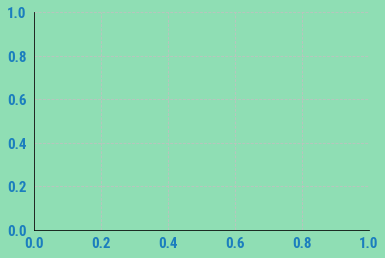

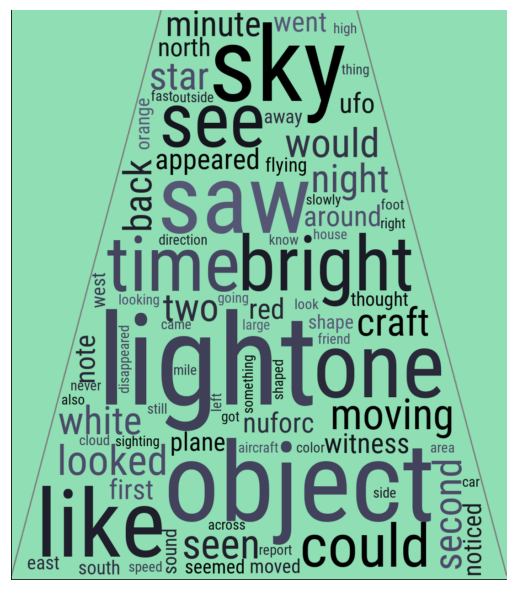

In [132]:
fig, ax = plt.subplots(facecolor='#8fdeb4')

figure(num=None, figsize=(12,8), edgecolor='#8fdeb4')

plt.imshow(unigram_wordcloud, interpolation='bilinear')
plt.grid(False)
plt.xticks(np.arange(0))
plt.yticks(np.arange(0))
plt.tight_layout(pad=0)

plt.savefig('word-cloud.svg', facecolor=fig.get_facecolor(), transparent=True, bbox_inches='tight')


# UFO SHAPES

In [64]:
df['shape'].fillna('Unknown', inplace=True)

In [65]:
df.rename(columns={'shape':'craft_shape'},inplace=True)

In [66]:
df.craft_shape = df.craft_shape.str.replace('Unknown', 'unknown')

In [67]:
df.craft_shape = df.craft_shape.str.lower()

In [34]:
df_no_missing_times = df 

In [35]:
df_no_missing_times.dropna(subset=['seen_at'], inplace=True)

In [36]:
df_no_missing_times.shape

(114022, 13)

In [154]:
df_no_missing_times.year.value_counts()

2014    8671
2012    8092
2013    7799
2015    6883
2016    5624
2011    5608
2008    5292
2017    5255
2009    4982
2010    4768
2004    4737
2007    4730
2005    4519
2003    4413
2006    4160
2002    3685
2001    3530
1999    3153
2000    3092
1998    2020
2018    1628
1995    1472
1997    1438
1996    1016
1994     505
1978     405
1993     384
1975     383
1976     343
1977     339
1974     326
1990     316
1992     314
1979     306
1980     302
1989     302
1988     288
1973     284
1991     284
1987     278
1985     258
1986     233
1982     224
1984     216
1972     212
1981     210
1983     207
1970     196
1969     190
1971     146
1968       4
Name: year, dtype: int64

In [37]:
df_no_missing_times['year'] = df_no_missing_times.seen_at.dt.year

In [160]:
crafts_over_years = df_no_missing_times[(df_no_missing_times.craft_shape != 'unknown') & (df_no_missing_times.craft_shape != 'other')].groupby('year').craft_shape.value_counts(normalize=True).unstack()



In [215]:
crafts_over_years.fillna(0).head()

craft_shape,changed,changing,chevron,cigar,circle,cone,crescent,cross,cylinder,delta,...,formation,hexagon,light,oval,pyramid,rectangle,round,sphere,teardrop,triangle
year,,,,,,,,,,,,,,,,,,,,,
1968,0.0,0.000000,0.000000,0.250000,0.000000,0.000000,0.0,0.000000,0.250000,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
1969,0.0,0.013158,0.000000,0.105263,0.111842,0.006579,0.0,0.006579,0.039474,0.0,...,0.046053,0.0,0.144737,0.085526,0.0,0.013158,0.0,0.105263,0.000000,0.065789
1970,0.0,0.006494,0.006494,0.012987,0.110390,0.006494,0.0,0.000000,0.032468,0.0,...,0.000000,0.0,0.142857,0.116883,0.0,0.019481,0.0,0.077922,0.006494,0.012987
1971,0.0,0.007634,0.015267,0.083969,0.145038,0.007634,0.0,0.007634,0.007634,0.0,...,0.022901,0.0,0.114504,0.076336,0.0,0.007634,0.0,0.061069,0.007634,0.076336
1972,0.0,0.000000,0.016854,0.044944,0.174157,0.000000,0.0,0.000000,0.028090,0.0,...,0.011236,0.0,0.174157,0.089888,0.0,0.011236,0.0,0.067416,0.011236,0.056180


In [ ]:
x,y = np.meshgrid(crafts_over_years.columns, crafts_over_years.index)

crafts_over_years *= 5000
plt.scatter(x=x.flatten(), y=y.flatten(), s=crafts_over_years.values.flatten())
plt.margins(.4)
plt.show()

In [226]:
crafts_over_years = crafts_over_years.drop(columns=['changed']).fillna(0)

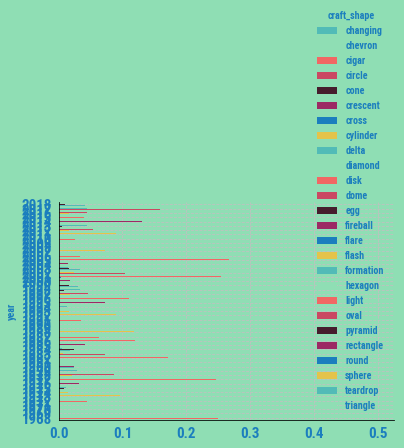

In [228]:
crafts_over_years.plot(kind='barh', x='year', y='')

In [138]:
df.rename(columns={'shape':'craft_shape'}, inplace=True)

In [145]:
squarecolors = ['#52bbb7', '#8fdeb4', '#f16764', '#ca4862', '#461d2d', '#1B7EBE', '#E4C34A']

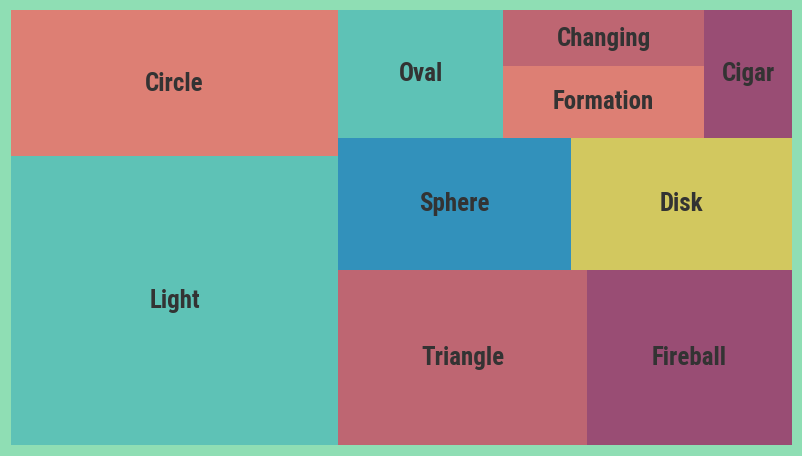

In [154]:
#df_top.tonality_name.value_counts().plot(kind='barh')

plt.rcParams.update({'text.color': '#333333',
                    'axes.spines.left' : False,
                    'axes.spines.bottom' : False})

plt.rc('font', size=25)

fig, ax = plt.subplots(facecolor='#8fdeb4')

shape_labels = [shape.title() for shape in df[(df.craft_shape != 'unknown') & (df.craft_shape != 'other')].craft_shape.value_counts().head(10).index]

fig.set_size_inches(14,8)

squarecolors = ['#52bbb7', '#f16764', '#ca4862', '#9C2964', '#1B7EBE', '#E4C34A']

ax = squarify.plot(sizes=df[(df.craft_shape != 'unknown') & (df.craft_shape != 'other')].craft_shape.value_counts().head(10), label=shape_labels, color=squarecolors, alpha=.8)
#plt.axis('off')
#plt.show()

ax.grid(False)
ax.set_xticklabels(labels='')
ax.set_yticklabels(labels='')


#ax.set_title('UFO shapes', loc='left', pad=10, fontdict={'color': 'dimgray'}, size=30)
#ax.text(0,104, 'Of the 100 top rated tabs on Ultimate Guitar, the keys of C and G reign supreme.', fontdict={'color': '#DDDDC9', 'family': 'serif'}, size=20)
plt.savefig("ufo-shapes.svg", facecolor=fig.get_facecolor(), transparent=True, bbox_inches='tight')



# REGEXING

In [11]:
df[df.text.str.contains('government')].iloc[1].text

'UFO disc reflecting sun while hovering silently north of Richmond, VAMy girlfriend and I saw what we believe was a shiny metallic disc-shaped UFO while driving our car on I-295 west while exiting onto I-95 south outside Richmond, VA, at 2:10 p.m., Monday, July 9, 2018.  I was driving my girlfriend to her doctor\'s appointment.  Our sighting lasted about one minute or less.  While slowing to exit from one interstate highway to another I noticed what appeared to be a metallic saucer-shaped craft high in the air.  The craft was north of our position at about 45 degrees above the horizon.  I estimate the altitude may have been 10,000-15,000 feet (higher than a light prop plane but lower than a cruising airliner).  At the time there was a sunny clear-blue sky to the north without clouds and unlimited visibility.  There were clouds to the south but they were not a factor.  I watched the craft trying to determine whether it might be an airplane but there was absolutely no discernible movemen

In [ ]:
df[df.text.str.contains('Roswell|Area 51|chemtrails|new world order|')]

In [52]:
df_no_missing_times.columns

Index(['city', 'city_latitude', 'city_longitude', 'date_time', 'duration',
       'posted', 'report_link', 'shape', 'state', 'stats', 'summary', 'text',
       'seen_at', 'year'],
      dtype='object')

In [57]:
df_no_missing_times[df_no_missing_times.text.str.contains('Delonge')].groupby('year').text.count()

year
2017    1
Name: text, dtype: int64

In [203]:
df[df.text.str.contains('abduct')].text[111875]

"Possible reptilian being sighting.   Greetings,   I am writing this statement on an incident that occurred on 10 Jul 2016, at approximately 6:00pm.  This is not a hoax, I am not looking for publicity or any such attention.  I am not sure is what I saw was a legitimate sighting and I am more looking more for answers to help me understand if what I saw was an actual alien being.   So, my friend, her son, and I drove from San Diego to San Francisco for leisure on Friday to Sunday.  On our way back, we were driving on the I-5 Fwy Southbound, towards San Diego.  We were approximately 10 mins south of Los Banos.  The scenery outside was barren, no buildings, structures  or people, just dry grassy hills and dirt roads on the sides of the freeway.   I was actually trying to get some rest when my friend the driver said, “What is that?” and pointed to the right side of the road.  I immediately looked over and saw a tall figure about 6 feet tall in a thick black monk/death looking robe with a bi

In [37]:
df[df.text.str.contains('NUFORC Note')]

,city,city_latitude,city_longitude,date_time,duration,posted,report_link,shape,state,stats,summary,text,seen_at
8,Tice,NaN,NaN,7/18/18 11:00,2 hours,7/19/18,http://www.nuforc.org/webreports/142/S142311.html,Other,FL,Occurred : 7/18/2018 11:00 (Entered as : 7/18...,Silent UFO mimic jets still floating over. ((...,Silent UFO mimic jets still floating over.A re...,2018-07-18 11:00:00
12,Vance,33.218400,-87.228700,7/17/18 22:40,>2 hours,7/19/18,http://www.nuforc.org/webreports/142/S142317.html,Chevron,AL,Occurred : 7/17/2018 22:40 (Entered as : 07/1...,Strange light above Vance/Mccalla. ((NUFORC N...,Strange light above Vance/Mccalla.Very noticea...,2018-07-17 22:40:00
21,Columbia,38.911477,-92.302430,7/16/18 20:01,15 seconds,7/19/18,http://www.nuforc.org/webreports/142/S142309.html,Other,MO,Occurred : 7/16/2018 20:01 (Entered as : 07/1...,Missouri Investigators Group Report: Two adul...,Missouri Investigators Group. Barb Becker ufom...,2018-07-16 20:01:00
39,Airdrie (Canada),NaN,NaN,7/15/18 00:40,4-5 seconds,7/19/18,http://www.nuforc.org/webreports/142/S142241.html,Triangle,AB,Occurred : 7/15/2018 00:40 (Entered as : 07/1...,Three lights in triangular formation. Swarmed ...,Three lights in triangular formation. Swarmed...,2018-07-15 00:40:00
40,Seaside,45.928200,-123.709300,7/14/18 23:00,10 seconds,7/19/18,http://www.nuforc.org/webreports/142/S142248.html,Triangle,OR,Occurred : 7/14/2018 23:00 (Entered as : 07/1...,Coming back from Stargazing. Then up off in t...,We we're walking back to our house as we we're...,2018-07-14 23:00:00
46,Sterling Heights,42.580553,-83.031643,7/14/18 01:00,"Hours, didn’t leave",7/19/18,http://www.nuforc.org/webreports/142/S142231.html,Circle,MI,Occurred : 7/14/2018 01:00 (Entered as : 07/1...,Bright Orange Light. ((NUFORC Note: Sighting...,Bright orange light that appeared to move clos...,2018-07-14 01:00:00
47,Atlantic Beach,30.360700,-81.426200,7/14/18 01:00,30 minutes,7/19/18,http://www.nuforc.org/webreports/142/S142235.html,Triangle,FL,Occurred : 7/14/2018 01:00 (Entered as : 07/1...,Bright reddish color. Stayed in position for ...,Bright reddish color. Stayed in position for ...,2018-07-14 01:00:00
51,Portland,43.673508,-70.280848,7/13/18 22:30,5 seconds,7/19/18,http://www.nuforc.org/webreports/142/S142319.html,Light,ME,Occurred : 7/13/2018 22:30 (Entered as : 07/1...,"A group of adults witness two lights, moving r...","A group of adults witness two lights, moving r...",2018-07-13 22:30:00
54,Barre,44.179300,-72.473100,7/13/18 21:00,10 minutes,7/19/18,http://www.nuforc.org/webreports/142/S142228.html,Fireball,VT,Occurred : 7/13/2018 21:00 (Entered as : 07/1...,"Orange lights fly by central Vermont, July 13t...","Orange lights fly by central Vermont, July 13t...",2018-07-13 21:00:00
83,Marco Island,25.937795,-81.698819,6/28/18 20:00,unknown,7/19/18,http://www.nuforc.org/webreports/142/S142287.html,Disk,FL,Occurred : 6/28/2018 20:00 (Entered as : 0628...,7 rounds balls of light hovering in the sky.((...,7 rounds balls of light hoovering in the skyI ...,2018-06-28 20:00:00


In [83]:
df[df.text.str.contains('skeptic')].iloc[120].text

'2 round objects "faded in" view as if coming from high altitude, zoomed east ~5 sec, covered ~15 deg., then faded out. April 10 1998, ~5:30 am (EDT), crystal clear sky, pre-dawn light, only the brightest stars still visible. Cassiopea was still very clearly visible on a pre-dawn blue as it is a bright constellation. Between the North Star and constellation Cassiopea, 2 round objects of apparent size of about a penny at 20 feet \'faded-in\' view as if coming from a higher altitude and coming down low enough not to be masked by the blue of the sky. The fade-in effect lasted about a second. It looked like something coming out af a fog. There seemed to be no self illumination. The color of the two UFOs could have been the reflection of the dawn Sun on a dull metallic surface. Hard to tell, apparent size was small. The color did not look even, sort of brighter in the center and brownish orange outside. Again this is more of an impression, as the size was too small for objective description

In [94]:
df[df.text.str.contains('Close Encounters')].text.iloc[4]

'I did not see a craft.  Neither did my mother, I am speaking on her behalf. She does\'t know much English.  What she saw one night in 1975 was what describes as a very ugly human like creature.  She said there was a full moon. she was sitting inside a little pick-up truck with a closed cab. There was three other people with her but they all were sleep.  When she tells me the story and remembers she seems as if she saw a ghost. She said she was setting on the drivers side looking at the moon and worring that shes was going to get in trouble for not being home. The place they were park at was very desolate then.  very country.  She recalls being able to see real good because of the moon light.  She said out of no where this pale creature jumped on the hood ofthe truck.  my mom said she was completely paralized.  panicking she could not move or scream.  then she says the thing moved over to her window, which was open. She said it look at her very curiously and paciently.  my mom thinks i

In [105]:
df[df.text.str.contains(r'Independence Day')]

,city,city_latitude,city_longitude,date_time,duration,posted,report_link,shape,state,stats,summary,text,seen_at,year
236,Riverside,33.939643,-117.400116,7/4/18 21:00,30-45 minutes,7/5/18,http://www.nuforc.org/webreports/142/S142078.html,Triangle,CA,Occurred : 7/4/2018 21:00 (Entered as : 07/4/...,Loud booms n weird tangle.,Loud booms n weird tangleThere was a lot of ai...,2018-07-04 21:00:00,2018
675,Granby,42.262300,-72.502800,7/4/77 19:45,3 minutes,5/31/18,http://www.nuforc.org/webreports/141/S141622.html,Disk,MA,Occurred : 7/4/1977 19:45 (Entered as : 07/04...,Saucer Shaped Craft seen by over 50 people Ind...,Saucer Shaped Craft seen by over 50 people Ind...,1977-07-04 19:45:00,1977
3027,Baton Rouge,30.427367,-91.086956,11/9/17 22:45,3-5 seconds,11/17/17,http://www.nuforc.org/webreports/137/S137213.html,Other,LA,Occurred : 11/9/2017 22:45 (Entered as : 11/0...,((HOAX??)) From my left to my right moved a v...,"I was smoking a cig, I’m alwys staring at the ...",2017-11-09 22:45:00,2017
3870,Middleton,NaN,NaN,7/4/17 21:00,4th of July fire work,9/28/17,http://www.nuforc.org/webreports/136/S136421.html,Light,NJ,Occurred : 7/4/2017 21:00 (Entered as : 07/04...,"Middletown, NJ, 3 bright yellow small circles ...","Middletown, NJ 3 bright yellow small circles i...",2017-07-04 21:00:00,2017
7509,Charlottesville,38.044760,-78.536577,1990-04-15T01:30:00,5 minutes,1999-04-02T00:00:00,http://www.nuforc.org/webreports/005/S05588.html,other,VA,Occurred : 01:30 (Entered as : 00/00/90 1:30...,"I have spoken of this to my friends, but have ...","I have spoken of this to my friends, but have ...",1990-04-15 01:30:00,1990
11135,"Garrafon, Isla Mujeres, Yucatan (Light House) ...",NaN,NaN,2000-03-25T11:30:00,Unknown,2000-04-15T00:00:00,http://www.nuforc.org/webreports/012/S12584.html,oval,NaN,Occurred : 3/25/2000 11:30 (Entered as : 03/2...,I photograhed my wife for a picture by the lig...,I photograhed my wife for a picture by the lig...,2000-03-25 11:30:00,2000
11919,Carbondale,39.181300,-107.226100,1990-08-05T14:00:00,2 minutes,2000-01-07T00:00:00,http://www.nuforc.org/webreports/011/S11526.html,other,CO,Occurred : 8/5/1990 14:00 (Entered as : 08/5/...,Playing baseball I looked in the sky and saw a...,Playing baseball I looked in the sky and saw a...,1990-08-05 14:00:00,1990
14683,Indian Lake,43.737100,-74.341900,2000-08-10T22:00:00,10 minutes,2000-08-19T00:00:00,http://www.nuforc.org/webreports/013/S13802.html,formation,NY,Occurred : 8/10/2000 22:00 (Entered as : 08/1...,Unmoving horizontal formation of about 8 very ...,Unmoving horizontal formation of about 8 very ...,2000-08-10 22:00:00,2000
21489,London (UK/England),NaN,NaN,1998-10-09T21:00:00,1-2hrs,2002-10-28T00:00:00,http://www.nuforc.org/webreports/025/S25660.html,other,NaN,Occurred : 10/9/1998 21:00 (Entered as : 10/0...,White lights seen emitting other smaller light...,White lights seen emitting other smaller light...,1998-10-09 21:00:00,1998
27936,Comfort,29.967700,-98.905000,1997-09-15T17:00:00,10 minutes,2003-06-03T00:00:00,http://www.nuforc.org/webreports/028/S28990.html,cylinder,TX,Occurred : 9/15/1997 17:00 (Entered as : 9/15...,1 cylinder object- highly polished silver. Joi...,1 cylinder object- highly polished silver. Joi...,1997-09-15 17:00:00,1997


In [18]:
df[df.text.str.contains(r'Art Bell')].iloc[2].text

"Red Star Movement in Sky Awesome All Summer. Summer of 1998 UFO Visable East Southeast Sky Most Everynight. I would go Outside Front Deck Have Smoke. Noticed a Red Star, Living in Country No City Light Intrfearance. While Watching Star Would Move In Sky Feet From My Perspective. Angle of Right and Diagnal also Straight Like and Backward Abrubt Stopping. I Told My Wife She Viewed 1 Time No Longer Would Come Outside Too See.  Denial, Fear. My Stepson and Friend Visiting From Boston Viewed and Got Excited with What They Saw. Took Photo with Phone Camera in 1998 Not Good Enough Cameras. Became a way of Life, some nights look other nights not even Think About. In 2000 Started Listening To Art Bell and Learning More About Subject. Now 2017 Often Think About.  Other UFO's Seen Unidenified Flying Objects No Idea. Moved Bought a Farm, Plasma Balls Darting Around Wood Visual 2 Times Lived Here 4 Years. Thank You"

In [25]:
df[df.text.str.contains(r'abduct')].iloc[5].text

"49  sec video taken of object seen over a long distance in travel, potential abduction, 20 min missing time..Silver gray about 30 feet long with 5 panels and what appeared to be 4 windows.  The man was on his way home from work at Versailles, KY, at 2:54 AM.  Drove about 8 miles west on Highway US 60 West to get to Interstate 64 West, a quarter of a mile or so from the interstate,  He noticed something that looked like a low flying plane. He looked at the time on radio and it was 3:14 AM.  He has tinted windows on his car so he let his window down to get a better look at it.  At that time he was close to the stoplight for the left turn to get on the interstate.  The light turned red and he stopped.  He noticed the craft in the air stopped also.  It really got his attention then.  When the light turned green he proceeded left and drove up the ramp onto the interstate.  A tractor trailer passed and he got in behind it.  To his left on the other side of the interstate he noticed the craf

In [109]:
df[df.text.str.contains('orbs')]

,city,city_latitude,city_longitude,date_time,duration,posted,report_link,shape,state,stats,summary,text,seen_at,year
48,Pawhuska,NaN,NaN,7/13/18 23:30,30 seconds,7/19/18,http://www.nuforc.org/webreports/142/S142240.html,Oval,OK,Occurred : 7/13/2018 23:30 (Entered as : 7 13...,2 aircraft side by side 1 was orange orb shape...,2 aircraft side by side 1 was orange orb shape...,2018-07-13 23:30:00,2018
87,Ranburne,33.552800,-85.388100,6/21/18 04:30,30 seconds,7/19/18,http://www.nuforc.org/webreports/142/S142286.html,Sphere,AL,Occurred : 6/21/2018 04:30 (Entered as : 06/2...,2 small bright orbs racing ahead and dancing a...,2 small bright orbs racing ahead and dancing a...,2018-06-21 04:30:00,2018
119,Seabrook Beach,NaN,NaN,7/10/18 03:00,18 minutes,7/13/18,http://www.nuforc.org/webreports/142/S142183.html,Triangle,NH,Occurred : 7/10/2018 03:00 (Entered as : 07/1...,Was in kayak in seabrook harbor when noticed a...,Was in kayak in seabrook harbor when noticed a...,2018-07-10 03:00:00,2018
168,Seneca,34.643557,-82.939653,7/6/18 02:30,5 minutes,7/13/18,http://www.nuforc.org/webreports/142/S142096.html,Sphere,SC,Occurred : 7/6/2018 02:30 (Entered as : 07/06...,"Bright Orange, Low, & Unusual Orb. Picture Ha...","Bright Orange, Low, & Unusual Orb. Picture Ha...",2018-07-06 02:30:00,2018
220,Elizabethtown,37.714967,-85.856541,7/4/18 22:30,4 minutes,7/5/18,http://www.nuforc.org/webreports/142/S142057.html,Triangle,KY,Occurred : 7/4/2018 22:30 (Entered as : 07/04...,I am a retired member of the U.S. military. I ...,I am a retired member of the U.S. military. I...,2018-07-04 22:30:00,2018
237,Waveland,30.285200,-89.378300,7/4/18 20:35,10:00,7/5/18,http://www.nuforc.org/webreports/142/S142058.html,Fireball,MS,Occurred : 7/4/2018 20:35 (Entered as : 07/04...,4th of July Red Orbs on Mississippi Gulf Coast,4th of July Red Orbs on Mississippi Gulf Coast...,2018-07-04 20:35:00,2018
246,Clinton,38.385900,-93.743100,7/2/18 20:30,2-3 minutes,7/5/18,http://www.nuforc.org/webreports/142/S142040.html,Formation,MO,Occurred : 7/2/2018 20:30 (Entered as : 7/02/...,4 bright orbs hovering horiz. then 4 more appe...,4 bright orbs hovering horizontally then 4 mor...,2018-07-02 20:30:00,2018
261,Newbury Park,34.170200,-118.955800,6/30/18 22:05,45 minutes,7/5/18,http://www.nuforc.org/webreports/142/S142076.html,Light,CA,Occurred : 6/30/2018 22:05 (Entered as : 06/3...,"Five colored orbs seen over Newbury Park, CA.","Five colored orbs seen over Newbury Park, CA....",2018-06-30 22:05:00,2018
307,Gilbert,33.339601,-111.781265,12/31/17 00:00,25 minutes,7/5/18,http://www.nuforc.org/webreports/141/S141995.html,Changing,AZ,Occurred : 12/31/2017 00:00 (Entered as : 12/...,As many as 7 Orbs seen ascending and descendin...,As many as 7 Orbs seen ascending and descendin...,2017-12-31 00:00:00,2017
318,Kingstree,33.657200,-79.776700,10/8/94 18:30,15 minutes,7/5/18,http://www.nuforc.org/webreports/142/S142038.html,Egg,SC,Occurred : 10/8/1994 18:30 (Entered as : 10/0...,Egg shaped yellowish lights that danced around...,Egg shaped yellowish lights that danced around...,1994-10-08 18:30:00,1994


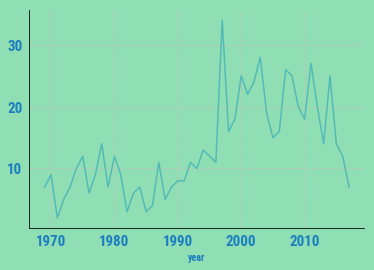

In [45]:
df_no_missing_times[(df_no_missing_times.year != 2018) & (df_no_missing_times.text.str.contains(r'abduct'))].groupby('year').text.count().plot()

# Clustering

In [53]:
def tokenize(s):
    blob = TextBlob(s.lower())
    words = [token for token in blob.words if token.isalpha() == True and len(token)>3]
    return words

In [56]:
vectorizer = TfidfVectorizer(stop_words='english', tokenizer=tokenize)

matrix = vectorizer.fit_transform(df.text)

In [58]:
number_of_clusters = 5
km=KMeans(n_clusters=number_of_clusters)
km.fit(matrix)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [59]:
def print_sorted_vector(v):
    # this "lambda" thing is an anonymous function, google me to unluck bonus coding knowledge
    sorted_list = sorted(v.items(), key=lambda x: (x[1],x[0]), reverse=True) 
    sorted_list = sorted_list[:10]
    print('\n'.join([str(x) for x in sorted_list]))

In [60]:
centroids = pd.DataFrame(km.cluster_centers_, columns=vectorizer.get_feature_names())
for i in range(number_of_clusters):
    print(f'\nCluster {i}')
    print_sorted_vector(centroids.iloc[i])


Cluster 0
('provides', 0.12007498021242066)
('elects', 0.1190027550286498)
('anonymous', 0.11829388804142822)
('remain', 0.11735178246239439)
('information', 0.11666165864648693)
('contact', 0.11321643878073256)
('totally', 0.11247840883811594)
('witness', 0.09834654882028586)
('nuforc', 0.09351610487650042)
('note', 0.09245709042240664)

Cluster 1
('like', 0.031885745327615005)
('craft', 0.025762746513753983)
('just', 0.02423151597245945)
('objects', 0.023467048033761796)
('looked', 0.02323858096046683)
('seen', 0.02136672630447854)
('time', 0.02106235873881412)
('object', 0.019361749594277267)
('light', 0.01927691607378918)
('moving', 0.018063772369409706)

Cluster 2
('light', 0.14596797060943736)
('bright', 0.07514708135260184)
('star', 0.04163835478174831)
('moving', 0.04029070588091684)
('like', 0.037494746492029725)
('white', 0.03748259776262194)
('just', 0.030375350685577247)
('looked', 0.02812283852050424)
('seen', 0.026020851865713967)
('lights', 0.025970870973150748)

Cluste

# Mapping

In [12]:
df_geotagged = df.dropna(subset=['city_latitude', 'city_longitude'])

In [14]:
df.state.value_counts()

CA    13347
FL     6351
WA     5797
TX     4860
NY     4607
AZ     3950
PA     3808
IL     3538
OH     3483
MI     2941
NC     2859
OR     2766
CO     2431
MO     2227
NJ     2212
VA     2077
GA     2076
ON     2075
MA     2055
IN     1968
WI     1938
TN     1786
SC     1751
MN     1626
CT     1468
MD     1445
NV     1335
KY     1310
NM     1259
OK     1131
      ...  
ID      918
ME      913
LA      909
NH      869
MT      792
WV      716
MS      618
NE      550
AK      546
AB      524
HI      514
RI      473
VT      471
QC      349
WY      317
DE      308
SD      303
MB      220
ND      206
NS      197
SK      186
NB      174
DC      135
PR       37
NL       36
YT       26
NT       24
PE       24
NF        3
VI        2
Name: state, Length: 66, dtype: int64